<a href="https://colab.research.google.com/github/dawit-andargachew/AI-playground/blob/main/Data%20Science/DataScience_Rice_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# load data whic is csv and print shape, and head of the dat
import pandas as pd
df = pd.read_csv('rice_train.csv')
print(df.shape)
print(df.head())




(2810, 8)
    Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231  525.578979         229.749878          85.093788      0.928882   
1  14656  494.311005         206.020065          91.730972      0.895405   
2  14634  501.122009         214.106781          87.768288      0.912118   
3  13176  458.342987         193.337387          87.448395      0.891861   
4  14688  507.166992         211.743378          89.312454      0.906691   

   Convex_Area    Extent  Class  
0        15617  0.572896      1  
1        15072  0.615436      1  
2        14954  0.693259      1  
3        13368  0.640669      1  
4        15262  0.646024      1  


In [5]:
import pandas as pd

# Assuming 'df' is your pandas DataFrame and 'Class' is the target variable column
num_classes = df['Class'].nunique()
class_names = df['Class'].unique()

# Print the result
print("Total number of classes:", num_classes)
print("Class names:", class_names)

Total number of classes: 2
Class names: [1 2]


In [2]:
# the data set has 8 attributes where the last one, named Class, is the target variable
import pandas as pd

# Assuming 'df' is your pandas DataFrame
covariance_matrix = df.cov()

# Display the covariance matrix
print(covariance_matrix)


                           Area     Perimeter  Major_Axis_Length  \
Area               2.993504e+06  59412.001480       27170.775338   
Perimeter          5.941200e+04   1260.896705         599.646114   
Major_Axis_Length  2.717078e+04    599.646114         302.069636   
Minor_Axis_Length  7.855582e+03    129.526184          45.611059   
Eccentricity       1.237989e+01      0.394350           0.253454   
Convex_Area        3.068342e+06  61177.226590       27889.913771   
Extent            -8.006942e+00     -0.348196          -0.181744   
Class             -6.386336e+02    -14.125170          -7.108100   

                   Minor_Axis_Length  Eccentricity   Convex_Area    Extent  \
Area                     7855.581867     12.379894  3.068342e+06 -8.006942   
Perimeter                 129.526184      0.394350  6.117723e+04 -0.348196   
Major_Axis_Length          45.611059      0.253454  2.788991e+04 -0.181744   
Minor_Axis_Length          33.012096     -0.034872  8.055596e+03  0.027433 

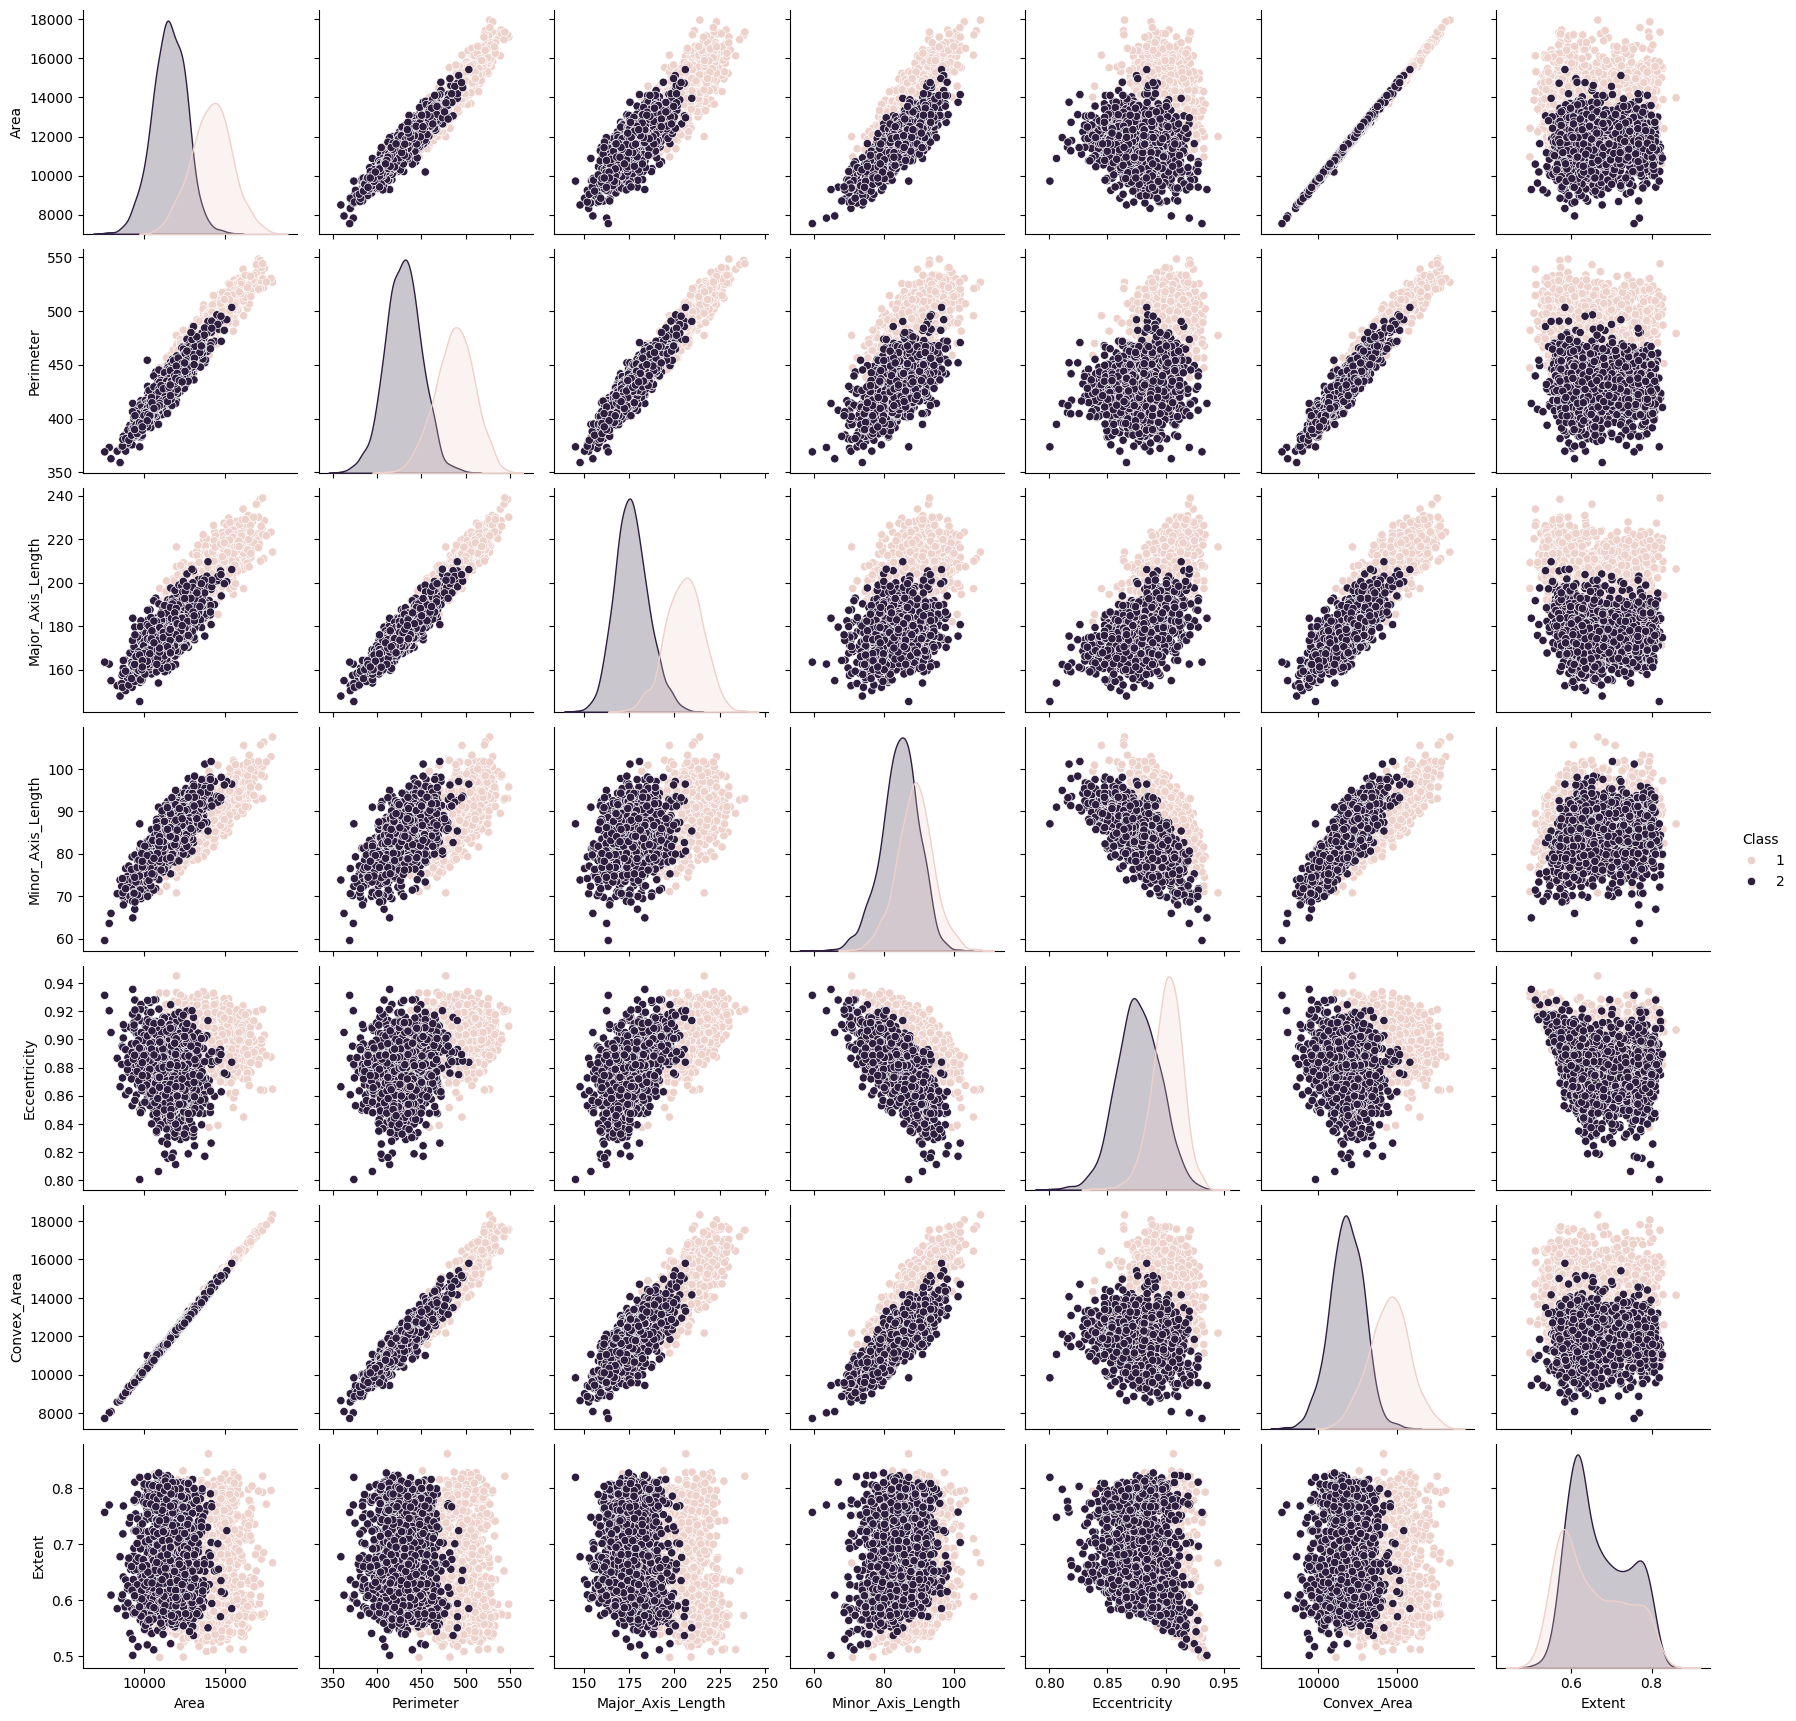

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your pandas DataFrame
sns.pairplot(df, hue='Class')  # 'Class' is your target variable column
plt.show()

In [7]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'Class' is the target variable column
features = df.drop(columns=['Class'])  # Exclude the target variable
correlation_matrix = features.corr()

# Display the correlation matrix
print(correlation_matrix)

                       Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  \
Area               1.000000   0.967040           0.903563           0.790227   
Perimeter          0.967040   1.000000           0.971632           0.634865   
Major_Axis_Length  0.903563   0.971632           1.000000           0.456752   
Minor_Axis_Length  0.790227   0.634865           0.456752           1.000000   
Eccentricity       0.346532   0.537846           0.706257          -0.293939   
Convex_Area        0.998953   0.970468           0.903909           0.789755   
Extent            -0.060022  -0.127180          -0.135626           0.061926   

                   Eccentricity  Convex_Area    Extent  
Area                   0.346532     0.998953 -0.060022  
Perimeter              0.537846     0.970468 -0.127180  
Major_Axis_Length      0.706257     0.903909 -0.135626  
Minor_Axis_Length     -0.293939     0.789755  0.061926  
Eccentricity           1.000000     0.347073 -0.193012  
Convex_Area      

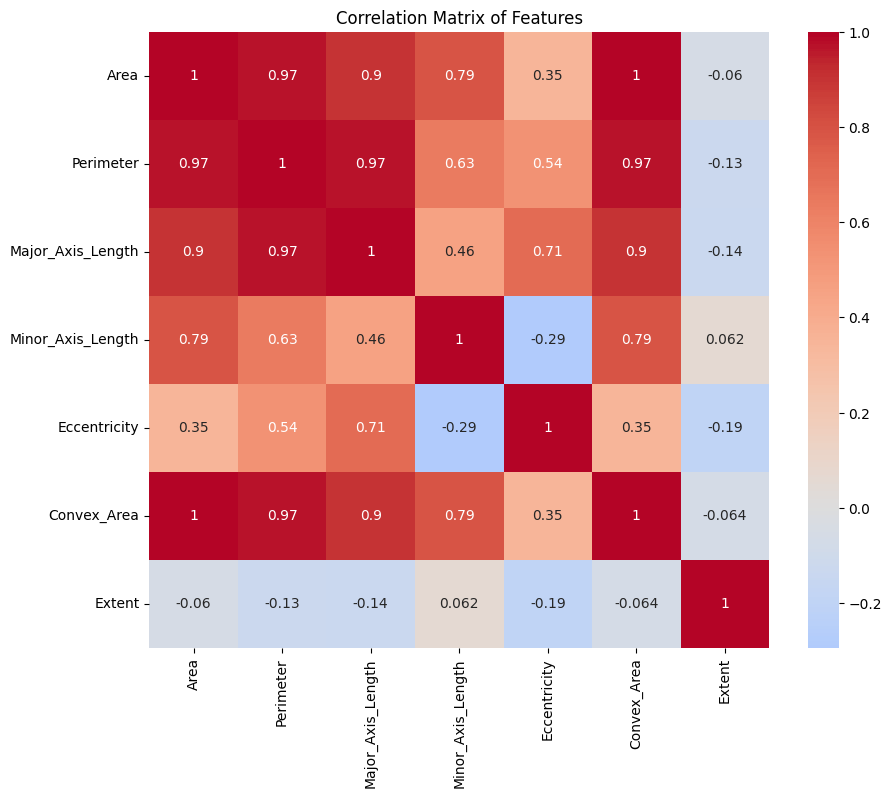

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Class' is the target variable column
features = df.drop(columns=['Class'])  # Exclude the target variable
correlation_matrix = features.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()

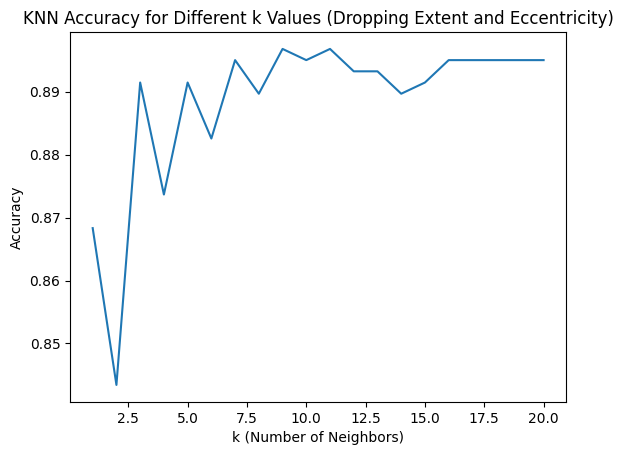

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load training data
df = pd.read_csv('rice_train.csv')

# Select features and target variable, dropping 'Extent' and 'Eccentricity'
X = df.drop(columns=['Class', 'Extent', 'Eccentricity'])
y = df['Class']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Store accuracies for different k values
k_values = range(1, 21)  # k values from 1 to 20
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

# Plot the results
plt.plot(k_values, accuracies)
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values (Dropping Extent and Eccentricity)')
plt.show()

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the training data
df = pd.read_csv('rice_train.csv')

# Select features and target variable, dropping 'Extent' and 'Eccentricity'
X = df.drop(columns=['Class', 'Extent', 'Eccentricity'])
y = df['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')  # You can experiment with different kernels

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9323843416370107


In [10]:
# load test
df_test = pd.read_csv('rice_test.csv')
print(df_test.shape)
print(df_test.head())


(1000, 7)
    Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  13662  476.352997         204.185654          85.614822      0.907848   
1  13822  491.661011         212.135406          83.654625      0.918962   
2  12918  459.828003         193.346573          86.058830      0.895480   
3  14934  488.270996         201.079956          95.979584      0.878729   
4  14695  506.915985         214.105530          88.913704      0.909694   

   Convex_Area    Extent  
0        13894  0.674167  
1        14073  0.654699  
2        13179  0.776696  
3        15193  0.650379  
4        15086  0.546608  


In [35]:
# ... (previous code for training SVM - from the previous response) ...

# Load test data
df_test = pd.read_csv('rice_test.csv')

# Select the same features used for training (excluding 'Extent' and 'Eccentricity')
X_test = df_test.drop(columns=['Extent', 'Eccentricity'])

# Make predictions on the test data using the trained SVM classifier
y_test_pred = svm_classifier.predict(X_test)

# Create a submission file
with open('submission.txt', 'w') as f:
    for prediction in y_test_pred:
        f.write(str(prediction) + '\n')

print("Predictions saved to submission.txt")

Predictions saved to submission.txt
